In [2]:
#importing dependencies and files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





In [3]:
ho_rates_df = pd.read_excel("Resources/homeowner_rates_05_18.xlsx", sheet_name="Sheet1")

In [4]:

ho_rates_df.head()


,MSA,Q105,Q205,Q305,Q405,Q106,Q206,Q306,Q406,Q107,...,Q116,Q216,Q316,Q416,Q117,Q217,Q317,Q417,Q118,Q218
0,"Akron, OH",75.7,81.0,79.3,76.2,75.3,75.3,79.5,78.6,80.5,...,71.2,76.6,77.7,73.2,70.0,68.0,68.2,64.2,73.1,69.3
1,"Albany-Schenectady-Troy, NY",72.0,66.5,61.7,65.2,65.8,68.7,66.7,66.9,66.5,...,65.6,60.8,58.2,60.9,69.3,67.2,60.6,60.0,58.2,63.1
2,"Albuquerque, NM",70.5,69.1,69.3,68.2,70.0,68.9,71.5,69.5,67.4,...,70.3,66.2,66.4,64.7,66.6,68.1,66.0,67.4,70.7,67.0
3,"Allentown-Bethlehem-Easton, PA-NJ",71.9,72.5,75.3,74.3,74.5,78.2,74.0,73.8,74.6,...,69.4,69.1,68.9,68.4,70.8,74.7,74.8,72.1,71.7,74.8
4,"Atlanta-Sandy Springs-Marietta, GA\1",65.0,63.7,66.1,70.7,68.9,67.4,68.5,66.9,68.8,...,62.9,62.1,59.3,61.6,64.4,61.1,61.8,62.2,67.4,62.3


In [5]:
ho_rates_df = pd.melt(ho_rates_df, id_vars="MSA", value_vars=['Q105', 'Q205', 'Q305', 'Q405', 'Q106', 'Q206', 'Q306', 'Q406', 'Q107', 'Q207', 'Q307', 'Q407', 'Q108', 'Q208', 'Q308',
                                       'Q408', 'Q109', 'Q209', 'Q309', 'Q409', 'Q110', 'Q210', 'Q310', 'Q410', 'Q111', 'Q211', 'Q311', 'Q411', 'Q112', 'Q212', 'Q312',
                                       'Q412', 'Q113', 'Q213', 'Q313', 'Q413', 'Q114', 'Q214', 'Q314', 'Q414', 'Q115', 'Q215', 'Q315', 'Q415', 'Q116', 'Q216', 'Q316', 
                                       'Q416', 'Q117', 'Q217', 'Q317', 'Q417', 'Q118', 'Q218', 'Q318', 'Q418'],
                                        var_name = "Period", value_name = "Rate")

ho_rates_df.head()

C:\Users\serna\Miniconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,MSA,Period,Rate
0,"Akron, OH",Q105,75.7
1,"Albany-Schenectady-Troy, NY",Q105,72.0
2,"Albuquerque, NM",Q105,70.5
3,"Allentown-Bethlehem-Easton, PA-NJ",Q105,71.9
4,"Atlanta-Sandy Springs-Marietta, GA\1",Q105,65.0


In [6]:
ho_rates_df['Quarter'] = ho_rates_df.Period.str[1]

ho_rates_df['Year'] = pd.to_numeric("20" + ho_rates_df.Period.str[2:4])
ho_rates_df.head()

,MSA,Period,Rate,Quarter,Year
0,"Akron, OH",Q105,75.7,1,2005
1,"Albany-Schenectady-Troy, NY",Q105,72.0,1,2005
2,"Albuquerque, NM",Q105,70.5,1,2005
3,"Allentown-Bethlehem-Easton, PA-NJ",Q105,71.9,1,2005
4,"Atlanta-Sandy Springs-Marietta, GA\1",Q105,65.0,1,2005


In [7]:
ho_rates_df['Year'].dtypes

dtype('int64')

In [8]:
ho_rates_group = ho_rates_df.groupby(['MSA', 'Year'])['Rate'].mean()

ho_rates_group = ho_rates_group.reset_index()
ho_rates_group.head()

,MSA,Year,Rate
0,"Akron, OH",2005,78.050
1,"Akron, OH",2006,77.175
2,"Akron, OH",2007,74.750
3,"Akron, OH",2008,77.350
4,"Akron, OH",2009,77.200


In [9]:
#pivot tables for index rate by year
ho_rates_pivot = pd.pivot_table(ho_rates_group, values='Rate', index='Year', columns='MSA')

ho_rates_pivot.head()

MSA,"Akron, OH","Albany-Schenectady-Troy, NY","Albuquerque, NM","Allentown-Bethlehem-Easton, PA-NJ","Atlanta-Sandy Springs-Marietta, GA\1","Austin-Round Rock, TX\2","Bakersfield, CA","Baltimore-Towson, MD\3","Baton Rouge, LA","Birmingham-Hoover, AL\4",...,"Springfield, MA","St Louis, MO-IL","Syracuse, NY","Tampa-St Petersburg-Clearwater, FL","Toledo, OH","Tucson, AZ","Tulsa, OK","Virginia Beach-Norfolk-Newport News, VA\35","Washington-Arlington-Alexandria, DC-VA-MD-WV\36","Worcester, MA"
Year,,,,,,,,,,,,,,,,,,,,,
2005,78.050,66.350,69.275,73.500,66.375,63.825,60.475,70.650,70.775,75.125,...,64.525,74.350,59.725,71.700,72.425,66.125,71.700,68.050,68.450,65.150
2006,77.175,67.025,69.975,75.125,67.925,66.625,62.175,72.950,65.000,76.125,...,62.325,72.825,66.025,71.600,70.750,67.425,67.800,68.350,68.900,70.975
2007,74.750,68.050,70.450,74.100,66.350,66.450,66.625,71.175,66.650,75.000,...,58.775,72.050,63.350,72.925,68.225,67.100,66.625,66.050,69.200,67.825
2008,77.350,69.500,68.200,74.075,67.500,65.475,59.375,69.350,74.150,73.300,...,63.725,72.175,62.350,70.500,67.125,63.575,66.650,63.875,68.100,68.550
2009,77.200,71.075,65.650,72.400,67.725,63.975,58.475,67.750,70.450,75.125,...,68.925,72.500,61.275,68.300,61.225,65.475,67.725,63.525,67.175,64.475


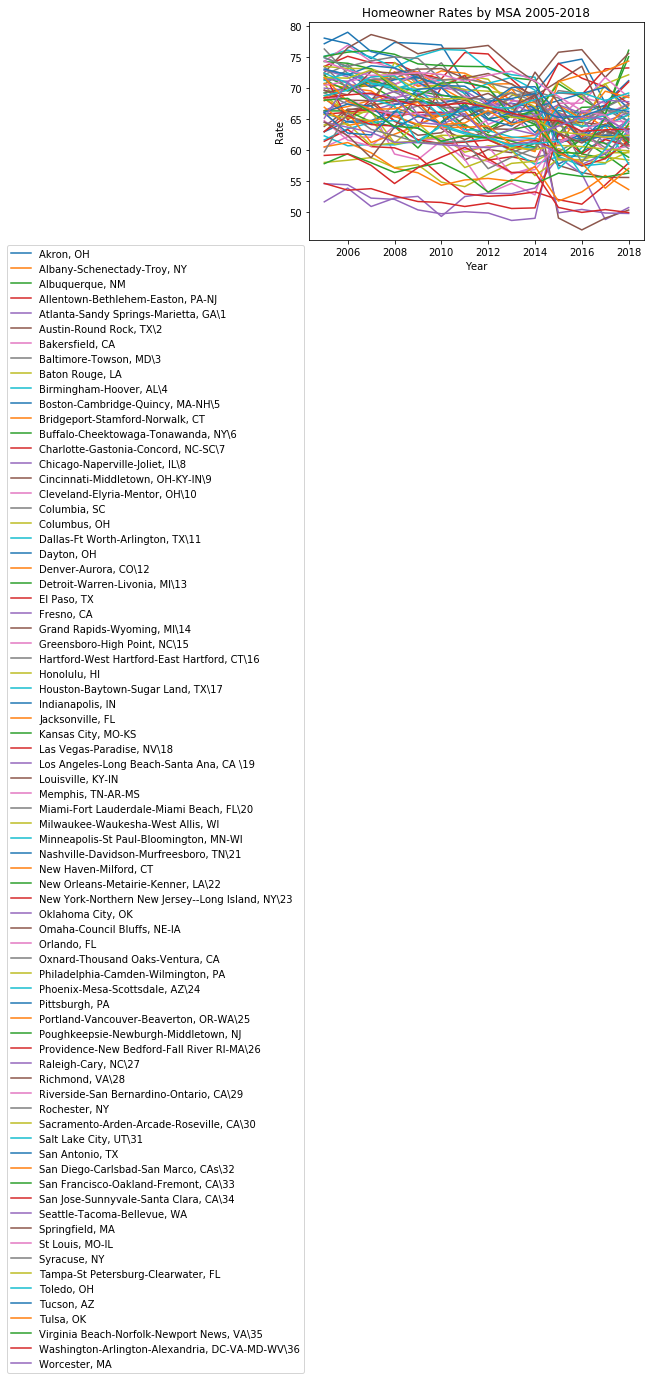

In [10]:
#plot line chart
ho_line_plot = ho_rates_pivot.plot(kind = 'line')
plt.title("Homeowner Rates by MSA 2005-2018")
ho_line_plot.set_ylabel("Rate")
plt.legend(bbox_to_anchor = (0,0))
plt.show()

Akron, OH 


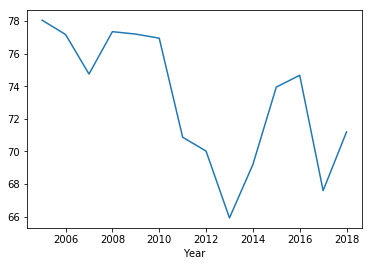

_________________
Albany-Schenectady-Troy, NY 


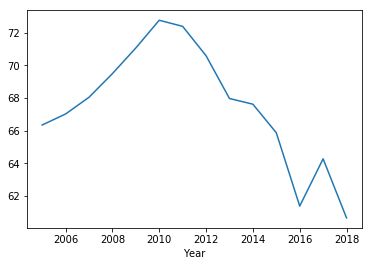

_________________
Albuquerque, NM


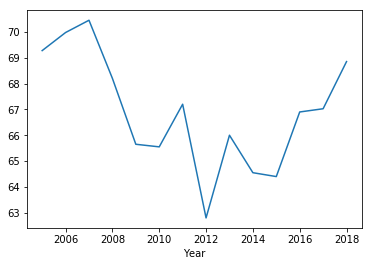

_________________
Allentown-Bethlehem-Easton, PA-NJ


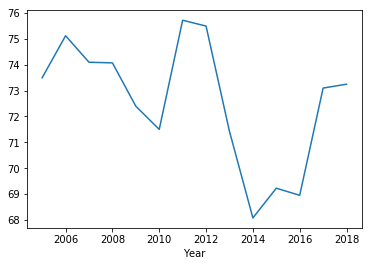

_________________
Atlanta-Sandy Springs-Marietta, GA\1


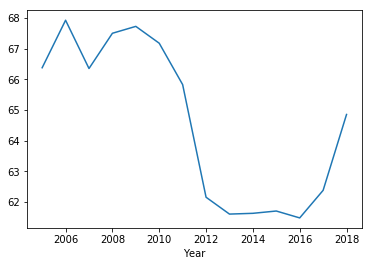

_________________
Austin-Round Rock, TX\2


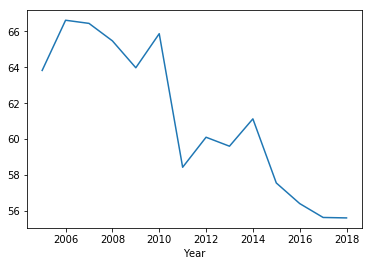

_________________
Bakersfield, CA


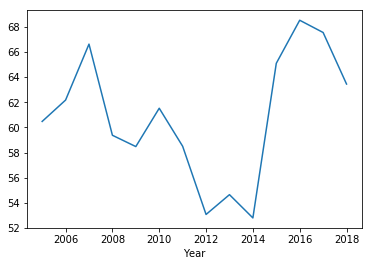

_________________
Baltimore-Towson, MD\3


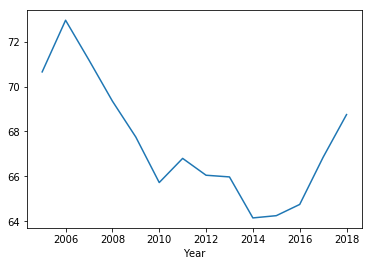

_________________
Baton Rouge, LA


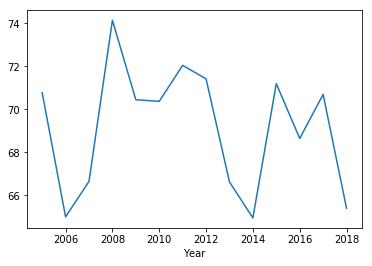

_________________
Birmingham-Hoover, AL\4


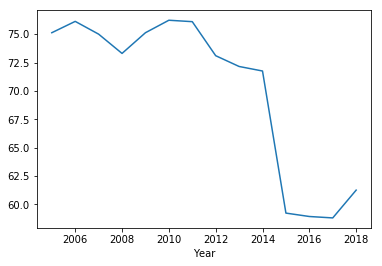

_________________
Boston-Cambridge-Quincy, MA-NH\5


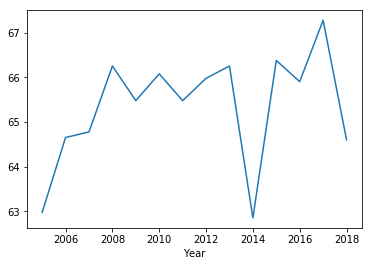

_________________
Bridgeport-Stamford-Norwalk, CT


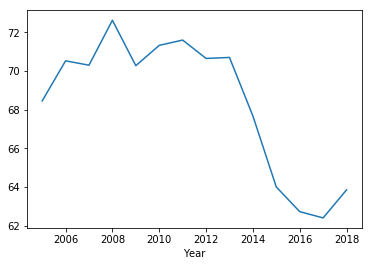

_________________
Buffalo-Cheektowaga-Tonawanda, NY\6


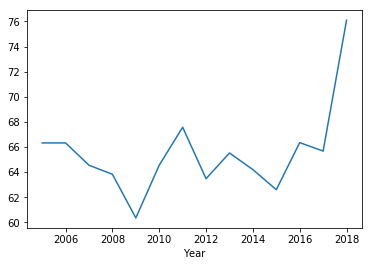

_________________
Charlotte-Gastonia-Concord, NC-SC\7


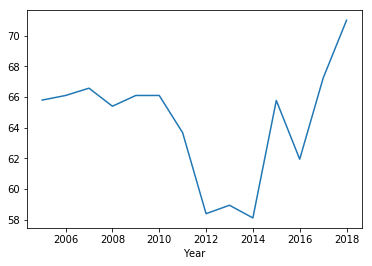

_________________
Chicago-Naperville-Joliet, IL\8


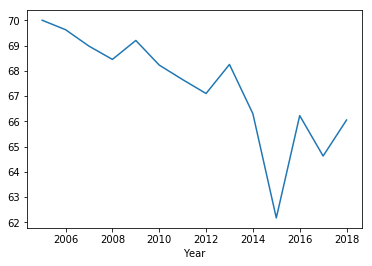

_________________
Cincinnati-Middletown, OH-KY-IN\9


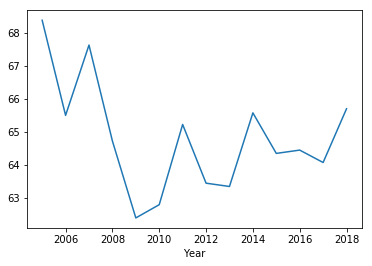

_________________
Cleveland-Elyria-Mentor, OH\10


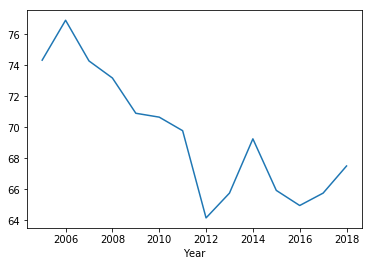

_________________
Columbia, SC


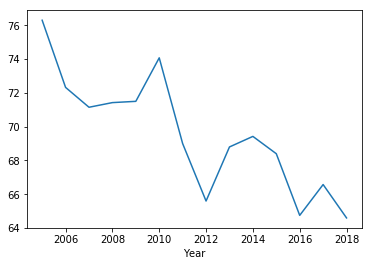

_________________
Columbus, OH


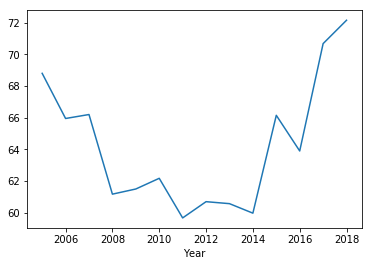

_________________
Dallas-Ft Worth-Arlington, TX\11


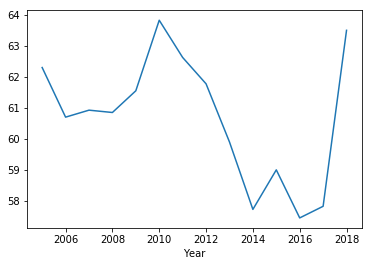

_________________
Dayton, OH


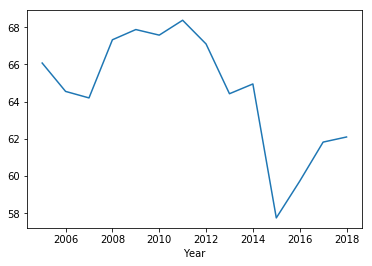

_________________
Denver-Aurora, CO\12


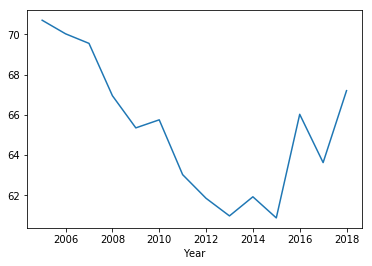

_________________
Detroit-Warren-Livonia, MI\13


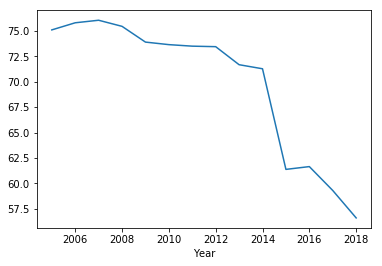

_________________
El Paso, TX


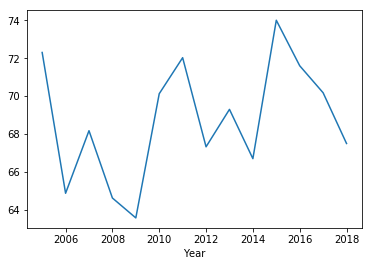

_________________
Fresno, CA


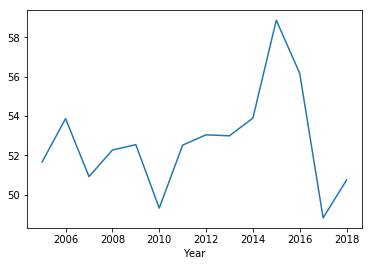

_________________
Grand Rapids-Wyoming, MI\14


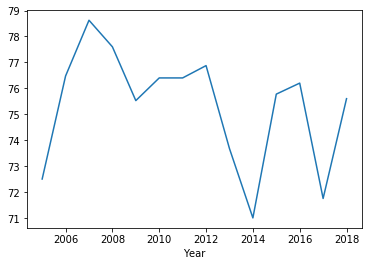

_________________
Greensboro-High Point, NC\15


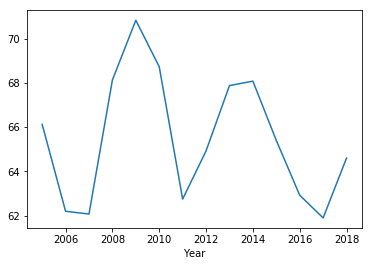

_________________
Hartford-West Hartford-East Hartford, CT\16


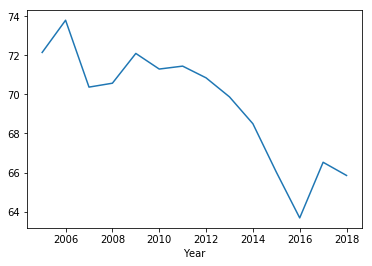

_________________
Honolulu, HI


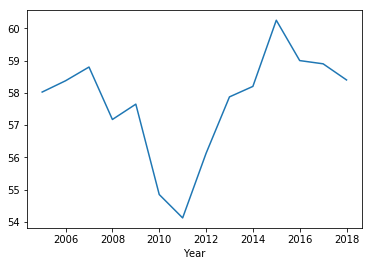

_________________
Houston-Baytown-Sugar Land, TX\17


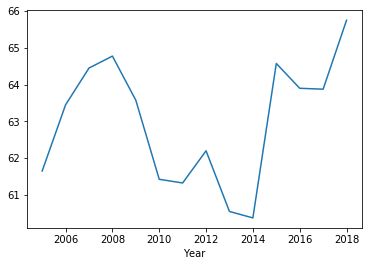

_________________
Indianapolis, IN


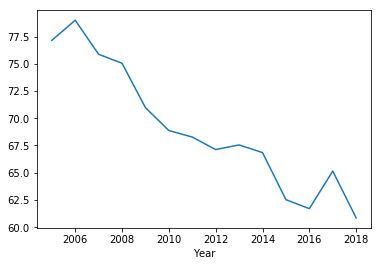

_________________
Jacksonville, FL


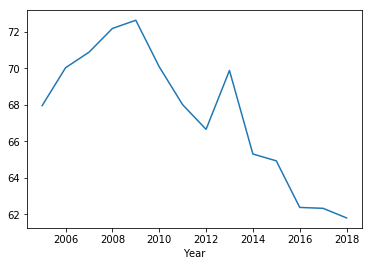

_________________
Kansas City, MO-KS


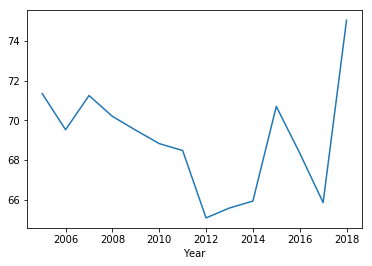

_________________
Las Vegas-Paradise, NV\18


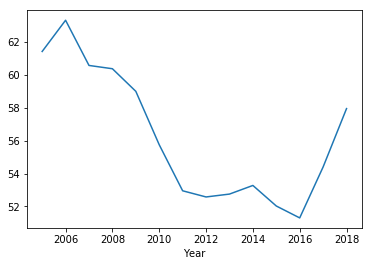

_________________
Los Angeles-Long Beach-Santa Ana, CA \19


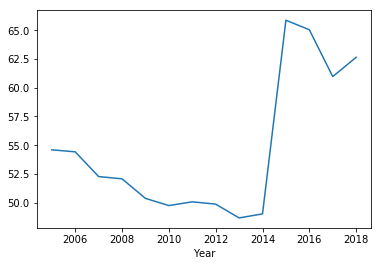

_________________
Louisville, KY-IN


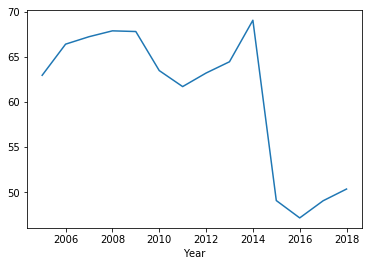

_________________
Memphis, TN-AR-MS


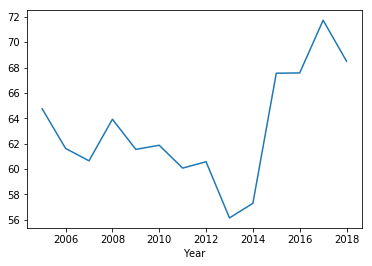

_________________
Miami-Fort Lauderdale-Miami Beach, FL\20


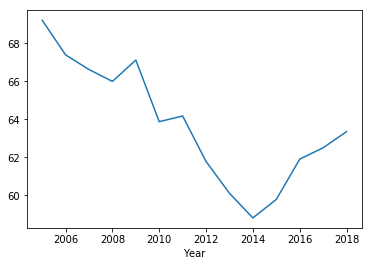

_________________
Milwaukee-Waukesha-West Allis, WI


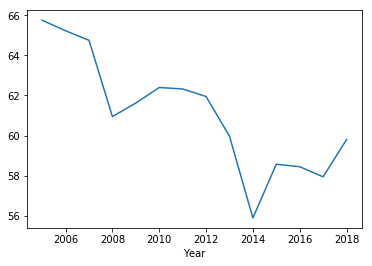

_________________
Minneapolis-St Paul-Bloomington, MN-WI 


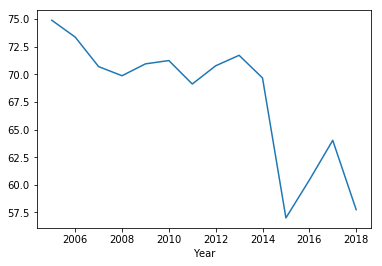

_________________
Nashville-Davidson-Murfreesboro, TN\21


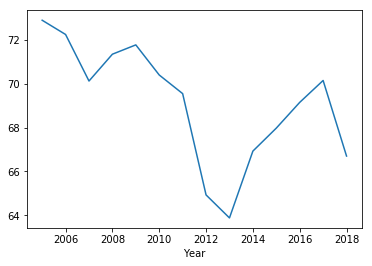

_________________
New Haven-Milford, CT


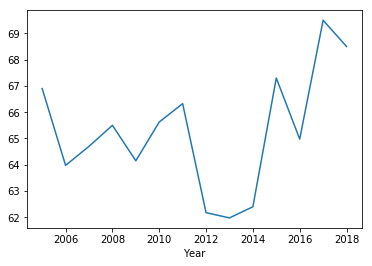

_________________
New Orleans-Metairie-Kenner, LA\22


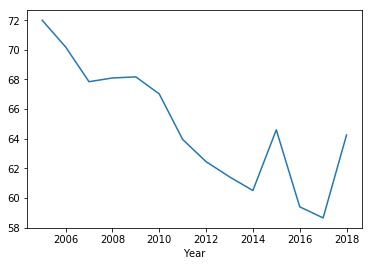

_________________
New York-Northern New Jersey--Long Island, NY\23


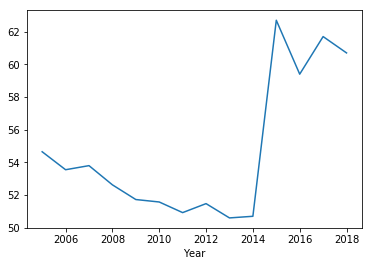

_________________
Oklahoma City, OK


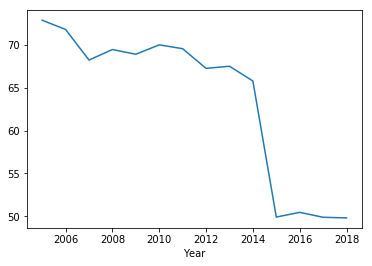

_________________
Omaha-Council Bluffs, NE-IA


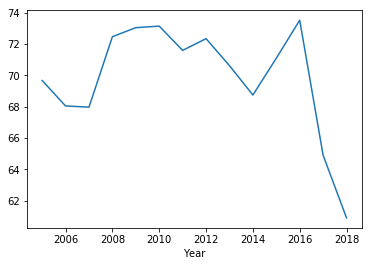

_________________
Orlando, FL


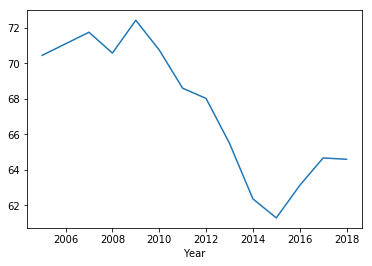

_________________
Oxnard-Thousand Oaks-Ventura, CA


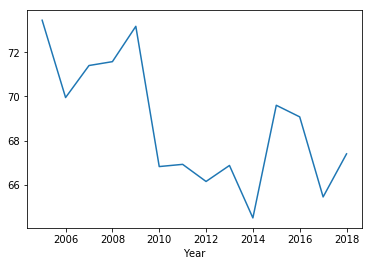

_________________
Philadelphia-Camden-Wilmington, PA 


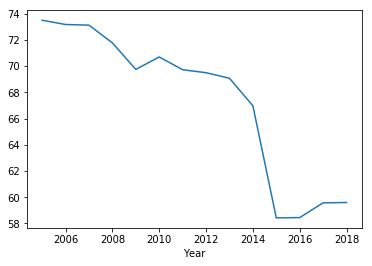

_________________
Phoenix-Mesa-Scottsdale, AZ\24


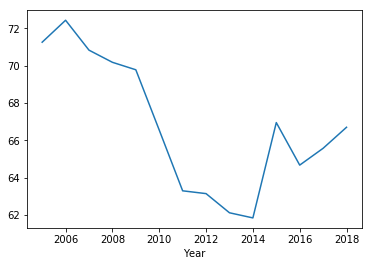

_________________
Pittsburgh, PA


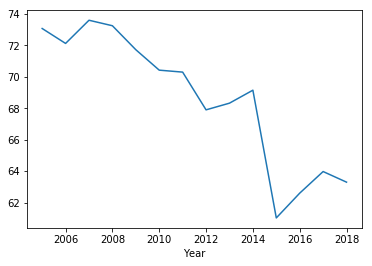

_________________
Portland-Vancouver-Beaverton, OR-WA\25


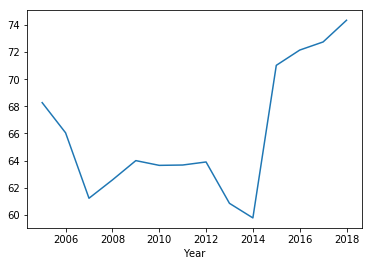

_________________
Poughkeepsie-Newburgh-Middletown, NJ


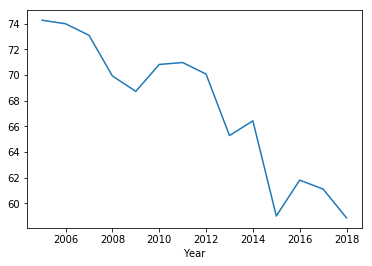

_________________
Providence-New Bedford-Fall River RI-MA\26


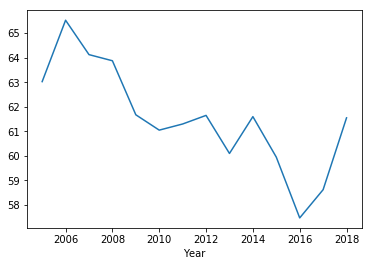

_________________
Raleigh-Cary, NC\27


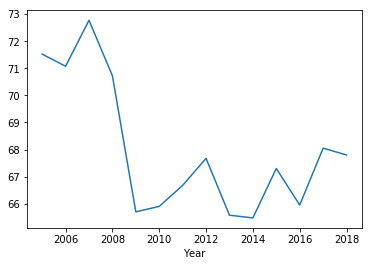

_________________
Richmond, VA\28


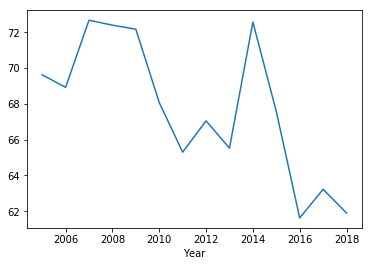

_________________
Riverside-San Bernardino-Ontario, CA\29


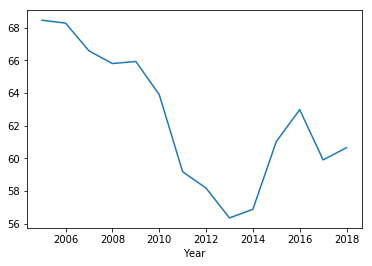

_________________
Rochester, NY


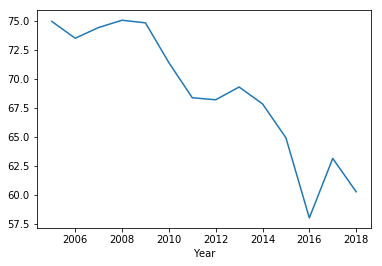

_________________
Sacramento-Arden-Arcade-Roseville, CA\30


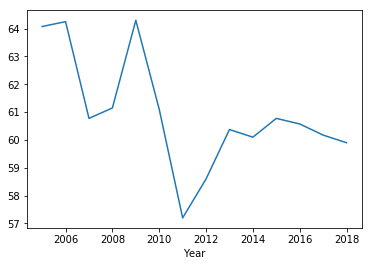

_________________
Salt Lake City, UT\31


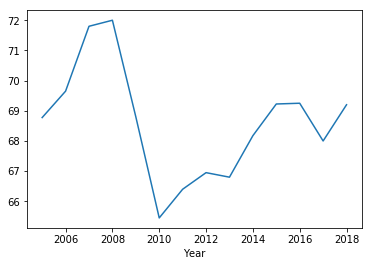

_________________
San Antonio, TX 


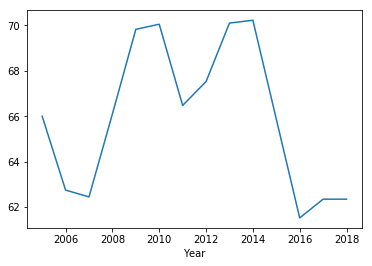

_________________
San Diego-Carlsbad-San Marco, CAs\32


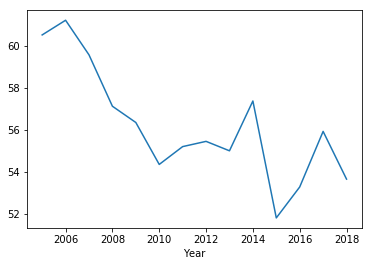

_________________
San Francisco-Oakland-Fremont, CA\33


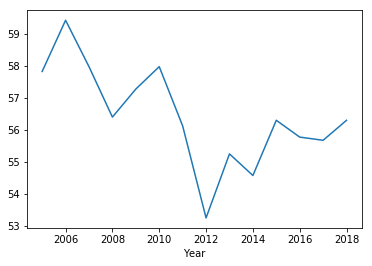

_________________
San Jose-Sunnyvale-Santa Clara, CA\34


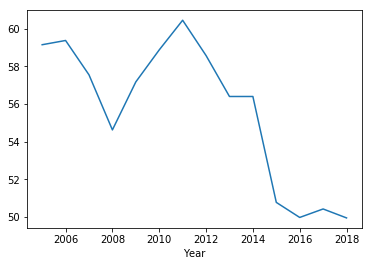

_________________
Seattle-Tacoma-Bellevue, WA


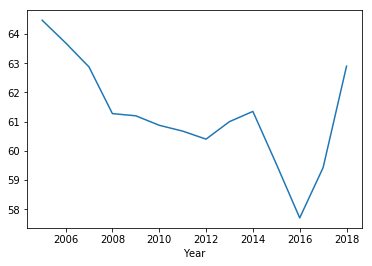

_________________
Springfield, MA


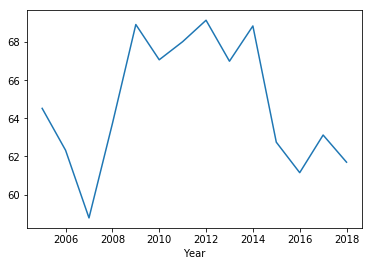

_________________
St Louis, MO-IL


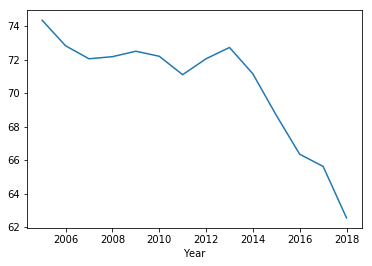

_________________
Syracuse, NY


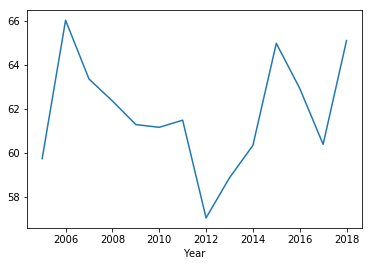

_________________
Tampa-St Petersburg-Clearwater, FL


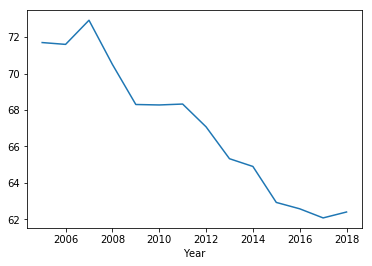

_________________
Toledo, OH


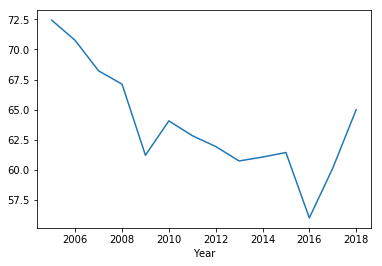

_________________
Tucson, AZ 


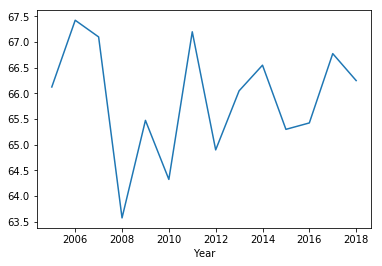

_________________
Tulsa, OK


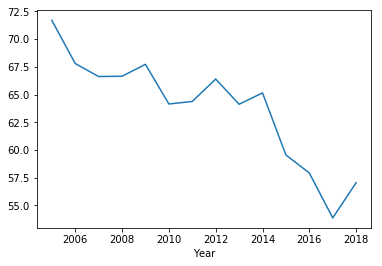

_________________
Virginia Beach-Norfolk-Newport News, VA\35


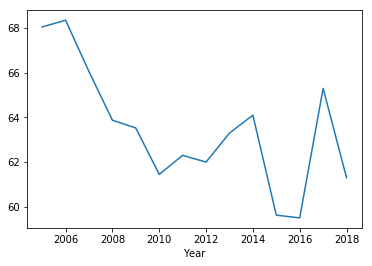

_________________
Washington-Arlington-Alexandria, DC-VA-MD-WV\36


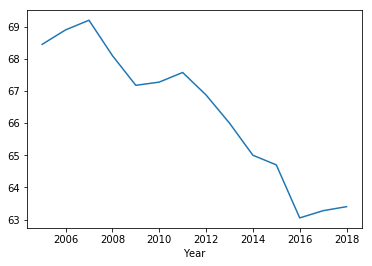

_________________
Worcester, MA


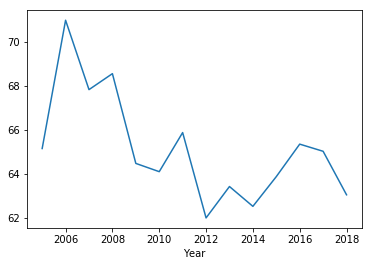

_________________


In [11]:
#plot line charts for each MSA
for MSA in ho_rates_pivot.columns.tolist():
    print(MSA)
    MSA_df = ho_rates_pivot[MSA]
    MSA_df.plot(kind='line')
    plt.xlabel = 'Year'
    plt.set_ylabel = 'Rate'
    plt.show()
    print('_________________')

In [38]:
ho_rates_change = ho_rates_pivot.pct_change()

for i in range(2006, 2018):
    print(i)
    percentage_change = ho_rates_change.loc[i]
    print(percentage_change)

2006
MSA
Akron, OH                                         -1.121076e-02
Albany-Schenectady-Troy, NY                        1.017332e-02
Albuquerque, NM                                    1.010466e-02
Allentown-Bethlehem-Easton, PA-NJ                  2.210884e-02
Atlanta-Sandy Springs-Marietta, GA\1               2.335217e-02
Austin-Round Rock, TX\2                            4.386996e-02
Bakersfield, CA                                    2.811079e-02
Baltimore-Towson, MD\3                             3.255485e-02
Baton Rouge, LA                                   -8.159661e-02
Birmingham-Hoover, AL\4                            1.331115e-02
Boston-Cambridge-Quincy, MA-NH\5                   2.659786e-02
Bridgeport-Stamford-Norwalk, CT                    3.031410e-02
Buffalo-Cheektowaga-Tonawanda, NY\6               -2.220446e-16
Charlotte-Gastonia-Concord, NC-SC\7                4.559271e-03
Chicago-Naperville-Joliet, IL\8                   -5.357143e-03
Cincinnati-Middletown, OH-KY-IN

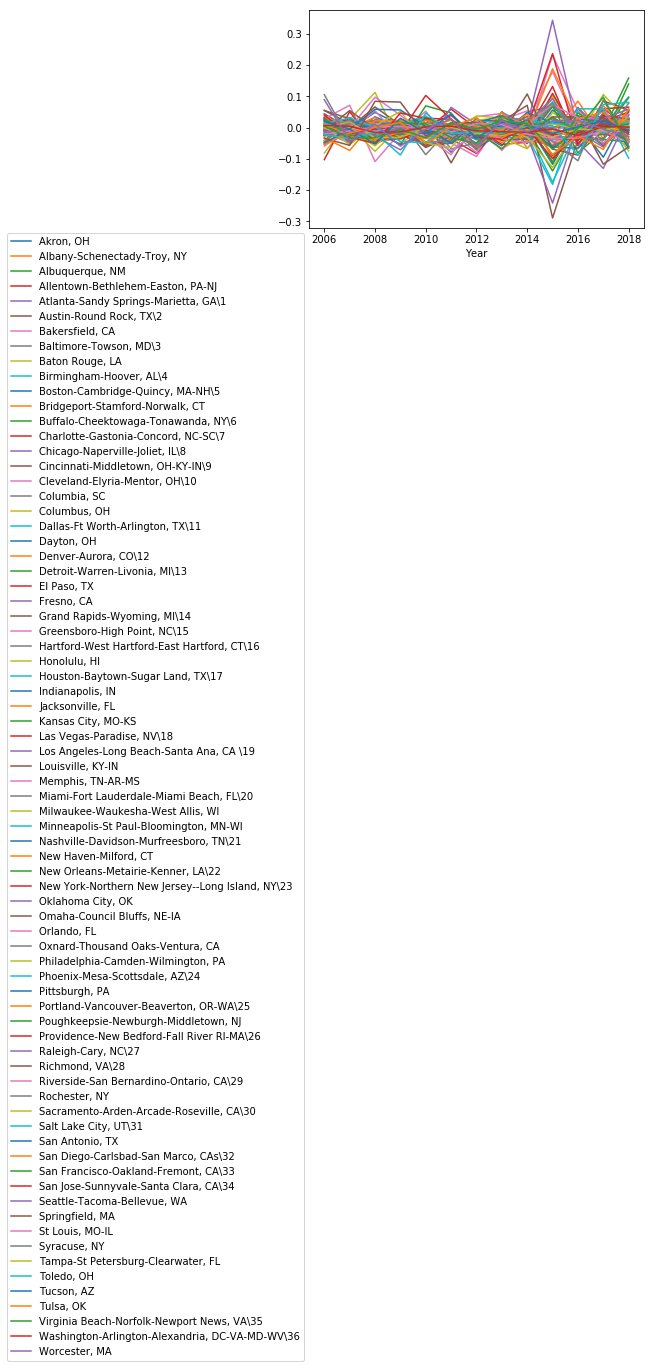

In [39]:
ho_rates_change.plot(kind='line')
plt.legend(bbox_to_anchor=(0,0))

plt.show()

Akron, OH 


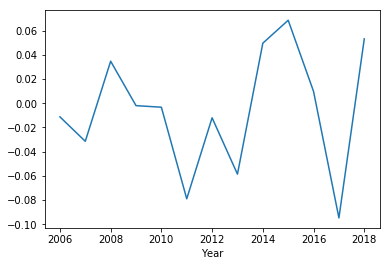

Albany-Schenectady-Troy, NY 


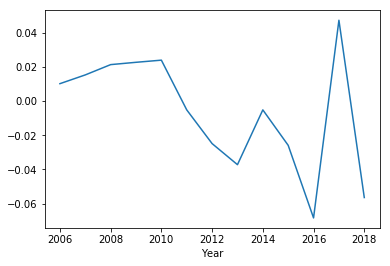

Albuquerque, NM


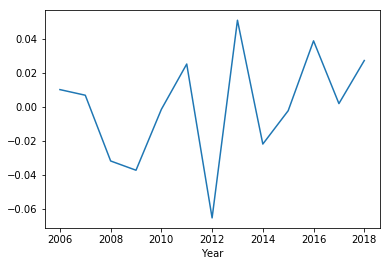

Allentown-Bethlehem-Easton, PA-NJ


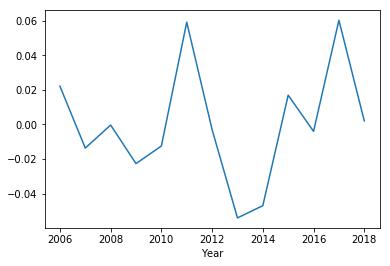

Atlanta-Sandy Springs-Marietta, GA\1


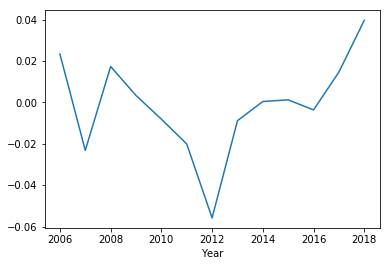

Austin-Round Rock, TX\2


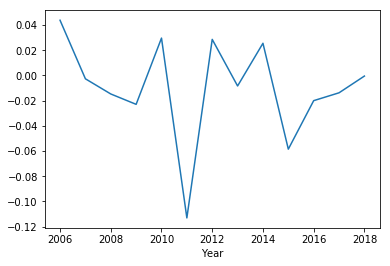

Bakersfield, CA


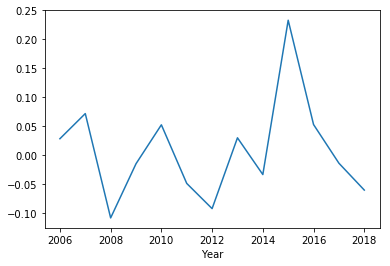

Baltimore-Towson, MD\3


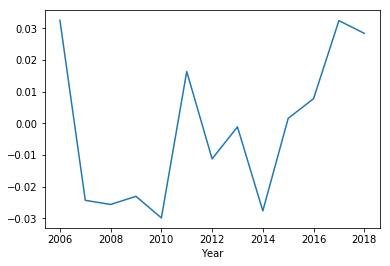

Baton Rouge, LA


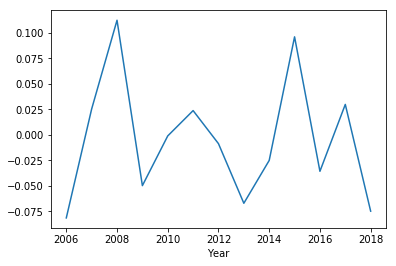

Birmingham-Hoover, AL\4


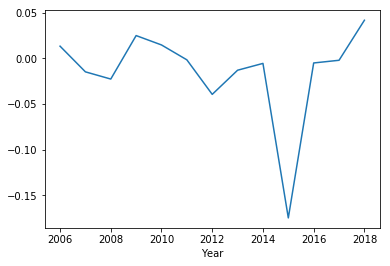

Boston-Cambridge-Quincy, MA-NH\5


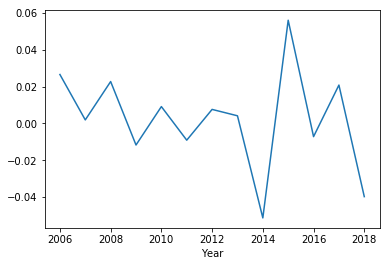

Bridgeport-Stamford-Norwalk, CT


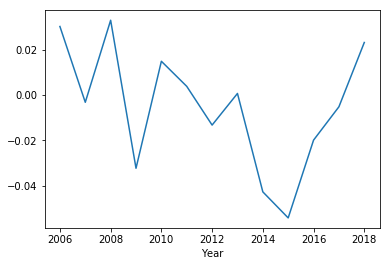

Buffalo-Cheektowaga-Tonawanda, NY\6


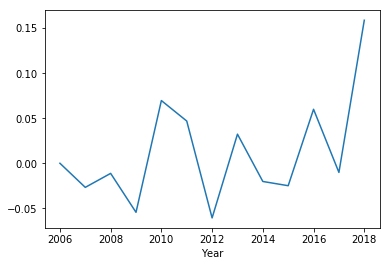

Charlotte-Gastonia-Concord, NC-SC\7


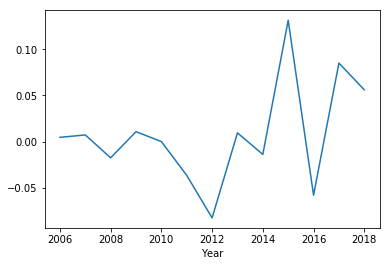

Chicago-Naperville-Joliet, IL\8


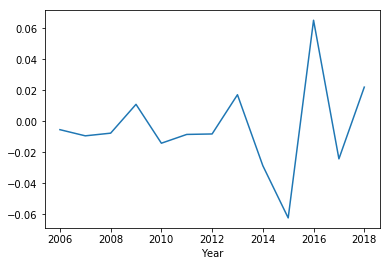

Cincinnati-Middletown, OH-KY-IN\9


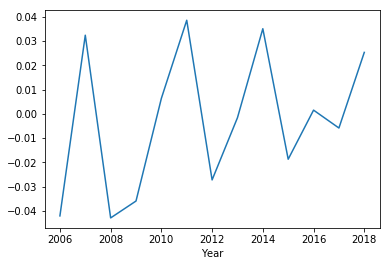

Cleveland-Elyria-Mentor, OH\10


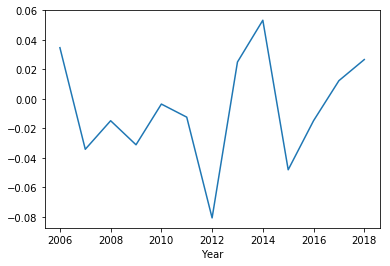

Columbia, SC


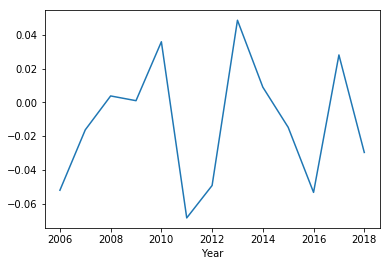

Columbus, OH


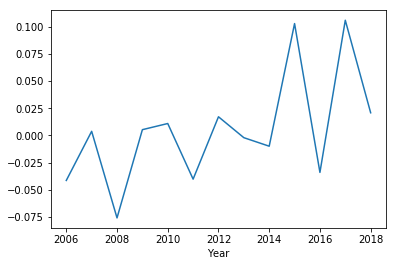

Dallas-Ft Worth-Arlington, TX\11


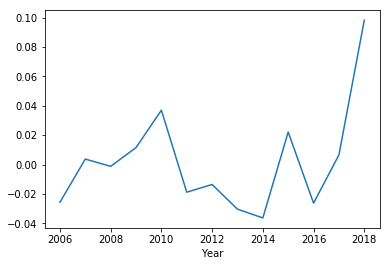

Dayton, OH


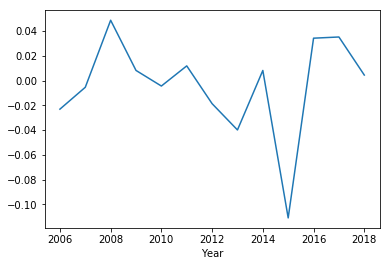

Denver-Aurora, CO\12


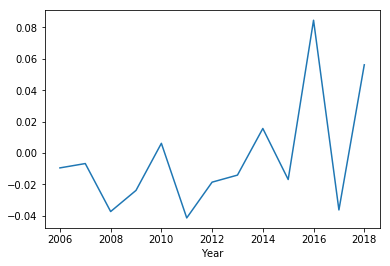

Detroit-Warren-Livonia, MI\13


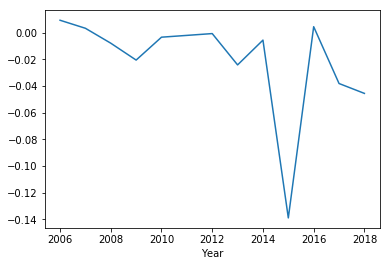

El Paso, TX


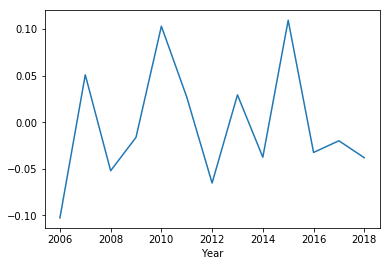

Fresno, CA


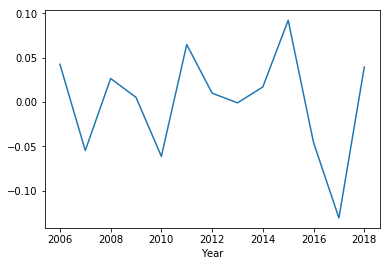

Grand Rapids-Wyoming, MI\14


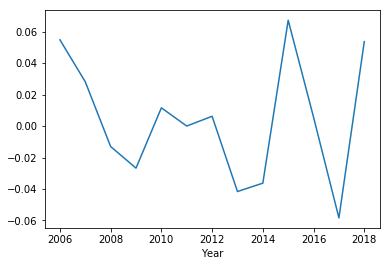

Greensboro-High Point, NC\15


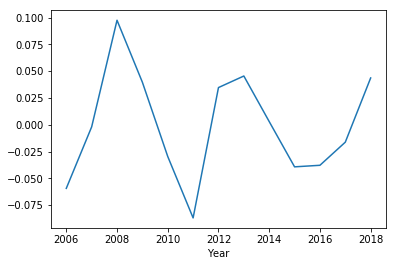

Hartford-West Hartford-East Hartford, CT\16


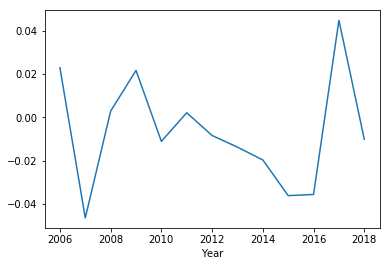

Honolulu, HI


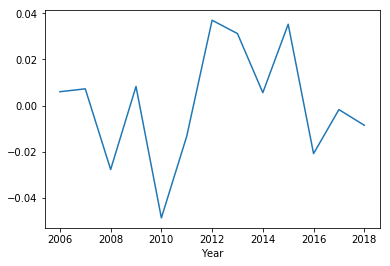

Houston-Baytown-Sugar Land, TX\17


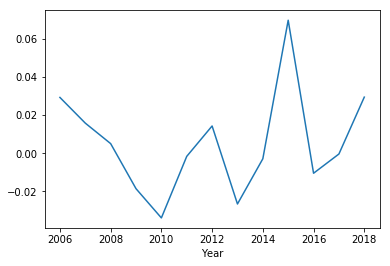

Indianapolis, IN


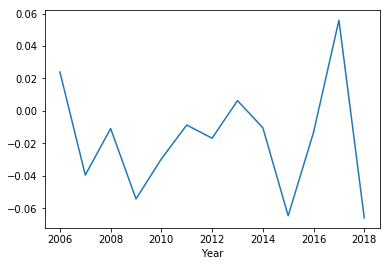

Jacksonville, FL


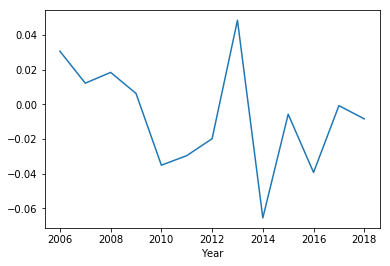

Kansas City, MO-KS


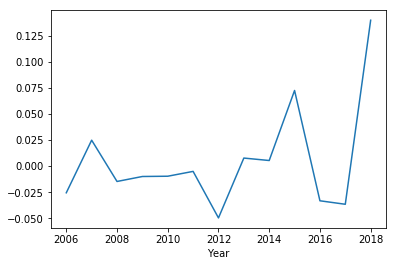

Las Vegas-Paradise, NV\18


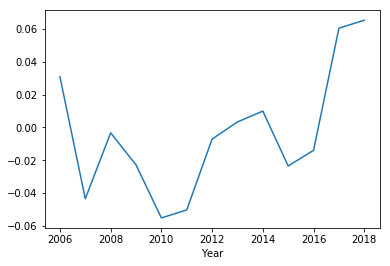

Los Angeles-Long Beach-Santa Ana, CA \19


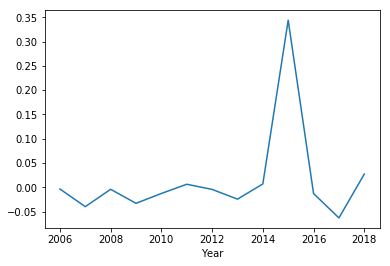

Louisville, KY-IN


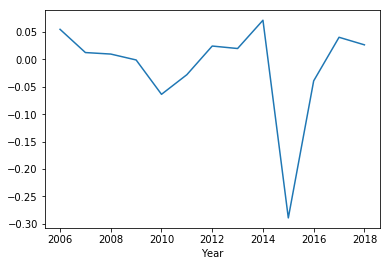

Memphis, TN-AR-MS


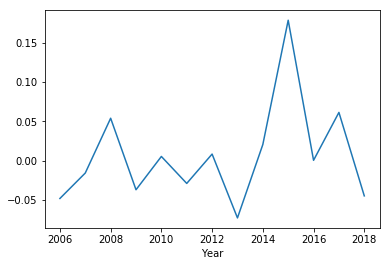

Miami-Fort Lauderdale-Miami Beach, FL\20


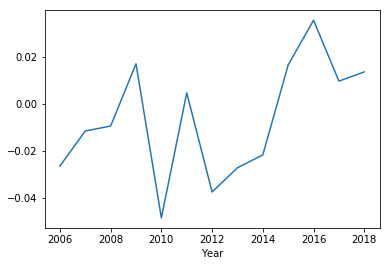

Milwaukee-Waukesha-West Allis, WI


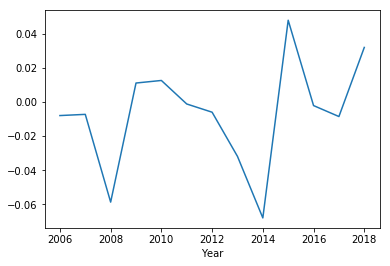

Minneapolis-St Paul-Bloomington, MN-WI 


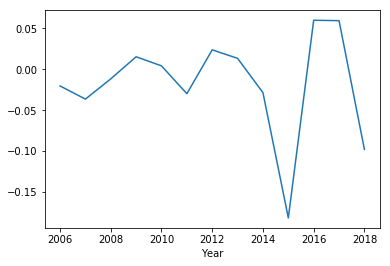

Nashville-Davidson-Murfreesboro, TN\21


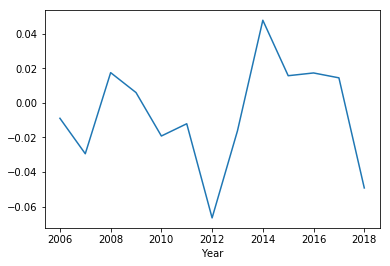

New Haven-Milford, CT


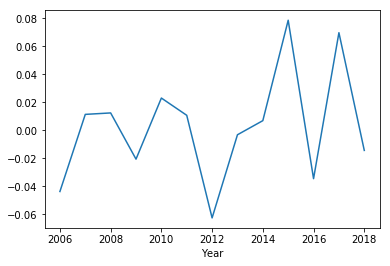

New Orleans-Metairie-Kenner, LA\22


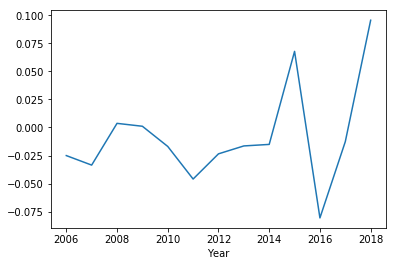

New York-Northern New Jersey--Long Island, NY\23


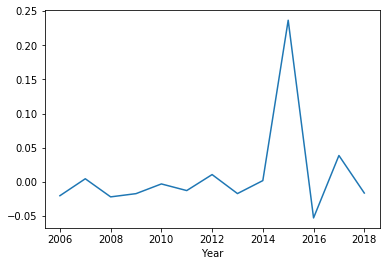

Oklahoma City, OK


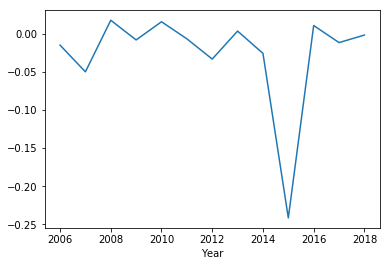

Omaha-Council Bluffs, NE-IA


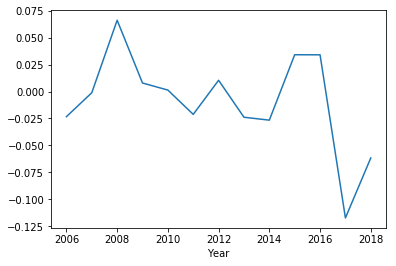

Orlando, FL


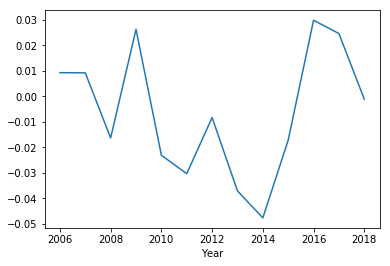

Oxnard-Thousand Oaks-Ventura, CA


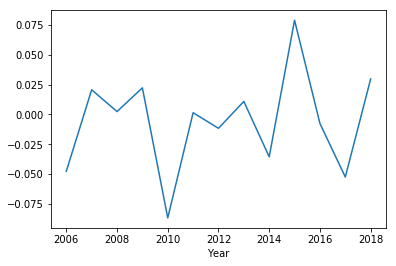

Philadelphia-Camden-Wilmington, PA 


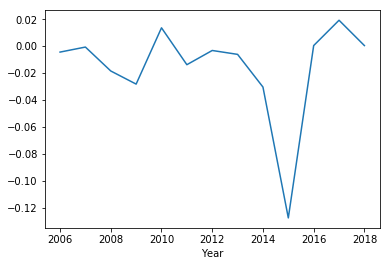

Phoenix-Mesa-Scottsdale, AZ\24


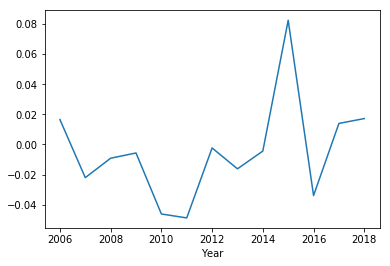

Pittsburgh, PA


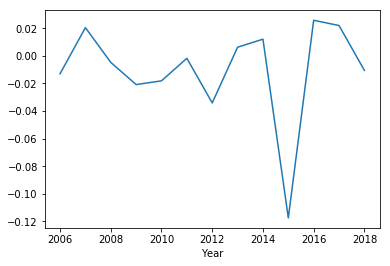

Portland-Vancouver-Beaverton, OR-WA\25


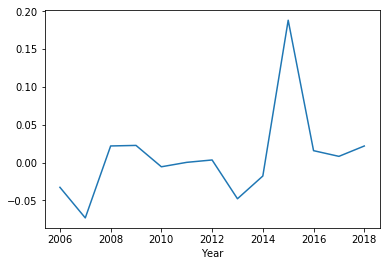

Poughkeepsie-Newburgh-Middletown, NJ


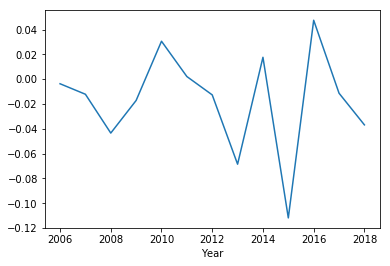

Providence-New Bedford-Fall River RI-MA\26


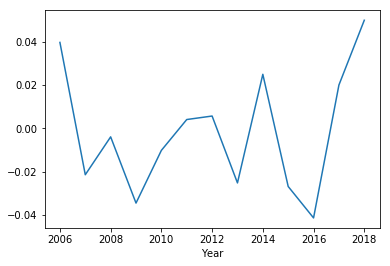

Raleigh-Cary, NC\27


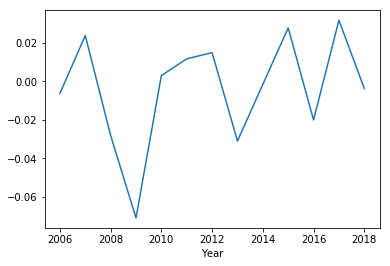

Richmond, VA\28


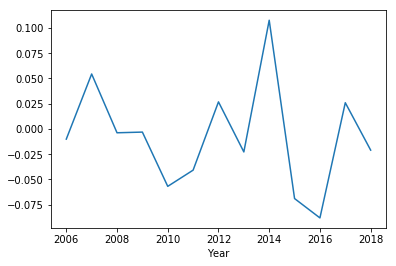

Riverside-San Bernardino-Ontario, CA\29


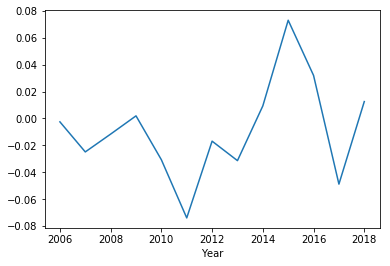

Rochester, NY


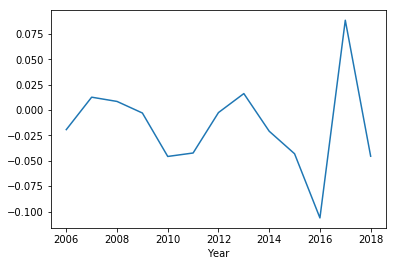

Sacramento-Arden-Arcade-Roseville, CA\30


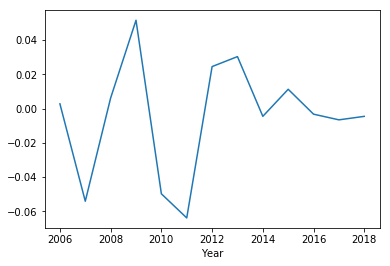

Salt Lake City, UT\31


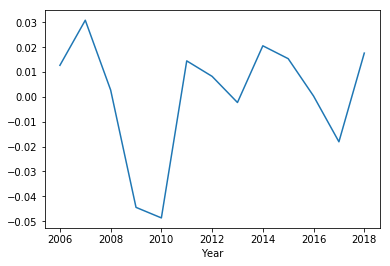

San Antonio, TX 


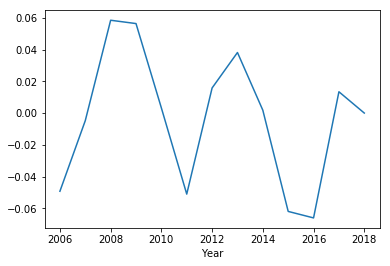

San Diego-Carlsbad-San Marco, CAs\32


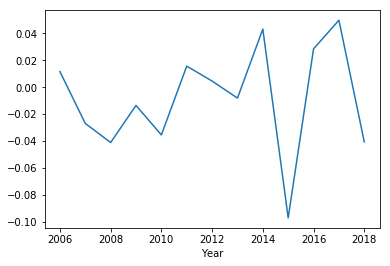

San Francisco-Oakland-Fremont, CA\33


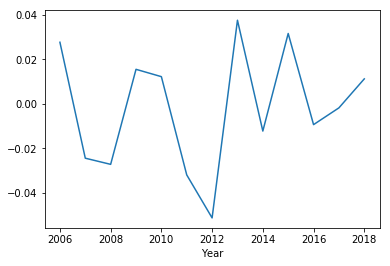

San Jose-Sunnyvale-Santa Clara, CA\34


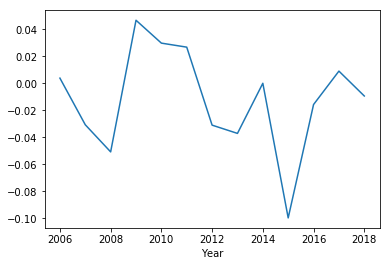

Seattle-Tacoma-Bellevue, WA


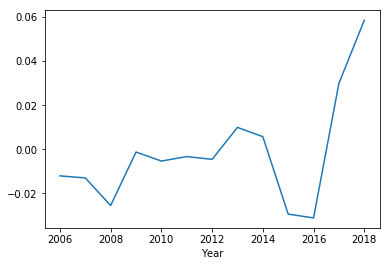

Springfield, MA


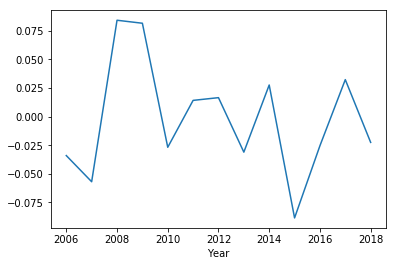

St Louis, MO-IL


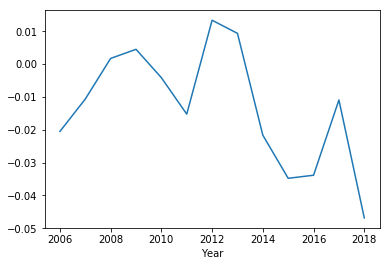

Syracuse, NY


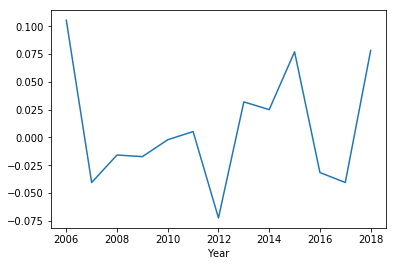

Tampa-St Petersburg-Clearwater, FL


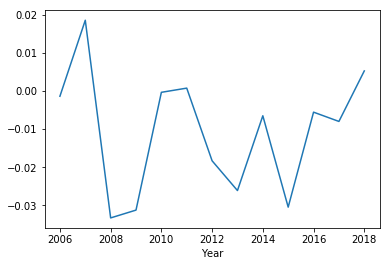

Toledo, OH


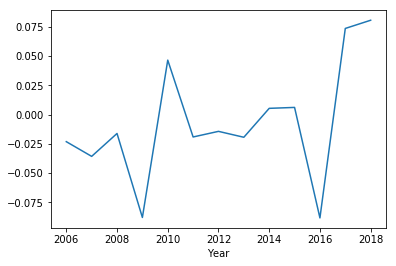

Tucson, AZ 


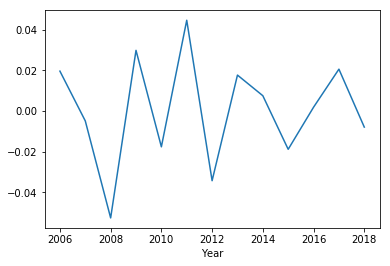

Tulsa, OK


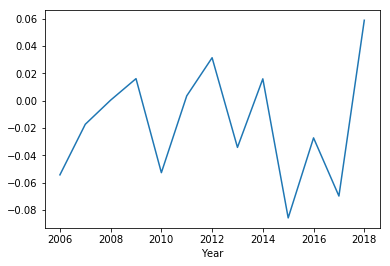

Virginia Beach-Norfolk-Newport News, VA\35


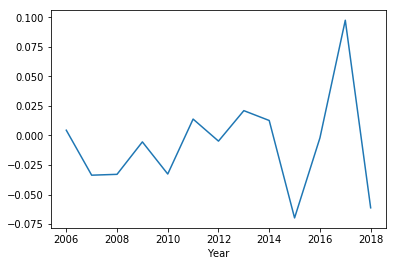

Washington-Arlington-Alexandria, DC-VA-MD-WV\36


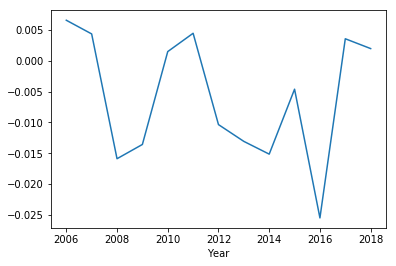

Worcester, MA


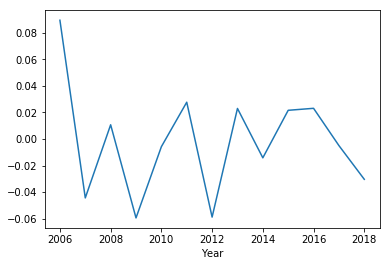

In [40]:
for MSA in ho_rates_change.columns.tolist():
    print(MSA)
    MSA_percentage = ho_rates_change[MSA]
    MSA_percentage.plot(kind='line')
    
    plt.show()